# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 73.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [ ]:
df_data.sample(5)

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
1670,4546,13.50,14,9.12,0,1,1982,29,36.00,"70,000.00",...,1,0,0,0,1,0,1,0,0,0
714,2398,15.38,16,6.62,0,1,1982,29,26.00,"24,635.00",...,1,0,0,1,0,0,1,0,0,0
72,6525,16.67,16,4.69,0,1,1982,29,35.00,"162,501.00",...,1,0,0,0,1,0,0,1,0,0
440,5479,22.00,16,4.12,1,0,1980,31,34.00,"27,116.00",...,0,0,1,0,0,0,1,0,0,0
248,4737,18.45,12,9.33,0,1,1982,29,29.00,"80,095.00",...,1,0,0,0,1,0,1,0,0,0


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f"Shape of the df_data is: {df_data.shape}. It means that df_data has {df_data.shape[0]} rows and {df_data.shape[1]} columns.")

Shape of the df_data is: (2000, 96). It means that df_data has 2000 rows and 96 columns.


In [ ]:
df_data.columns #columns names

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [ ]:
print(f'Any NaN values? {df_data.isna().values.any()}')

Any NaN values? True


In [ ]:
df_data.isna().sum()

ID          0
EARNINGS    0
S           0
EXP         0
FEMALE      0
           ..
MSA11NO     0
MSA11NCC    0
MSA11CC     0
MSA11NK     0
MSA11NIC    0
Length: 96, dtype: int64

In [ ]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? True


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
df_data.fillna(0, inplace=True)
df_data.isna().values.sum()

0

In [ ]:
df_data.duplicated().values.any()

True

In [ ]:
duplicated_rows = df_data[df_data.duplicated()]
print(duplicated_rows.shape)

(513, 96)


In [ ]:
df_data = df_data.drop_duplicates(subset=["ID",	"EARNINGS",	"S",	"EXP",	"FEMALE",	"MALE",	"BYEAR"])

In [ ]:
df_data.duplicated().values.any()

False

In [ ]:
df_data.shape

(1487, 96)

## Descriptive Statistics

In [ ]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,25.72,"47,252.43",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,6.38,"45,629.92",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,22.00,"13,740.50",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"41,840.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"66,400.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

* S: Years of schooling (highest grade completed as of 2011)
* EXP: Total out-of-school work experience (years) as of the 2011 interview.
* EARNINGS: Current hourly earnings in $ reported at the 2011 interview

#### Years of schooling

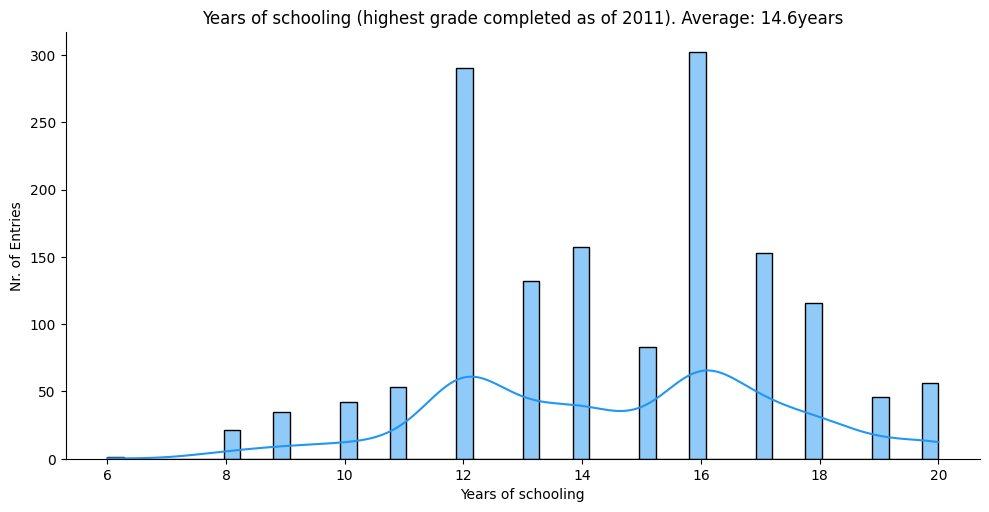

In [ ]:
sns.displot(df_data['S'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Years of schooling (highest grade completed as of 2011). Average: {(df_data.S.mean()):.3}years')
plt.xlabel('Years of schooling')
plt.ylabel('Nr. of Entries')

plt.show()

#### Total out-of-school work experience


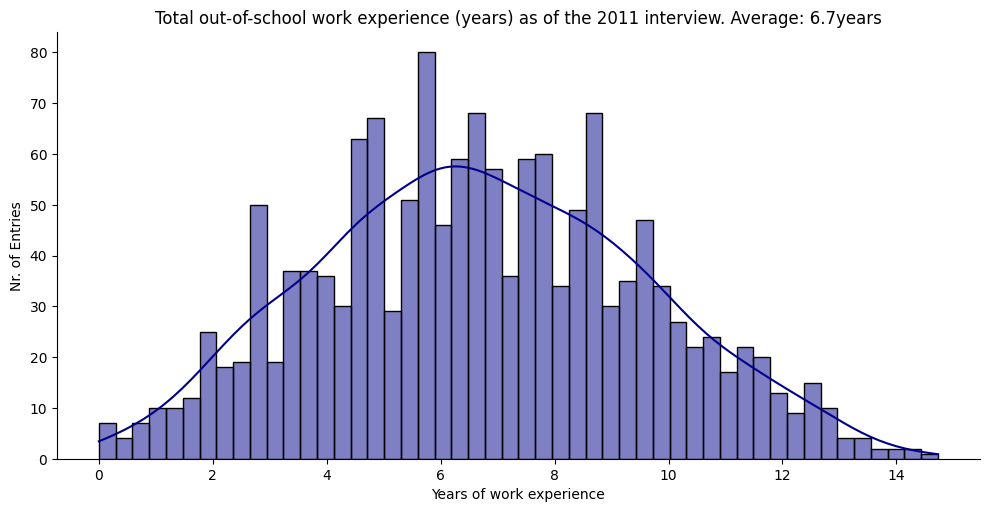

In [ ]:
sns.displot(df_data['EXP'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Total out-of-school work experience (years) as of the 2011 interview. Average: {(df_data.EXP.mean()):.3}years')
plt.xlabel('Years of work experience')
plt.ylabel('Nr. of Entries')

plt.show()

#### Current hourly earnings in $ reported at the 2011 interview

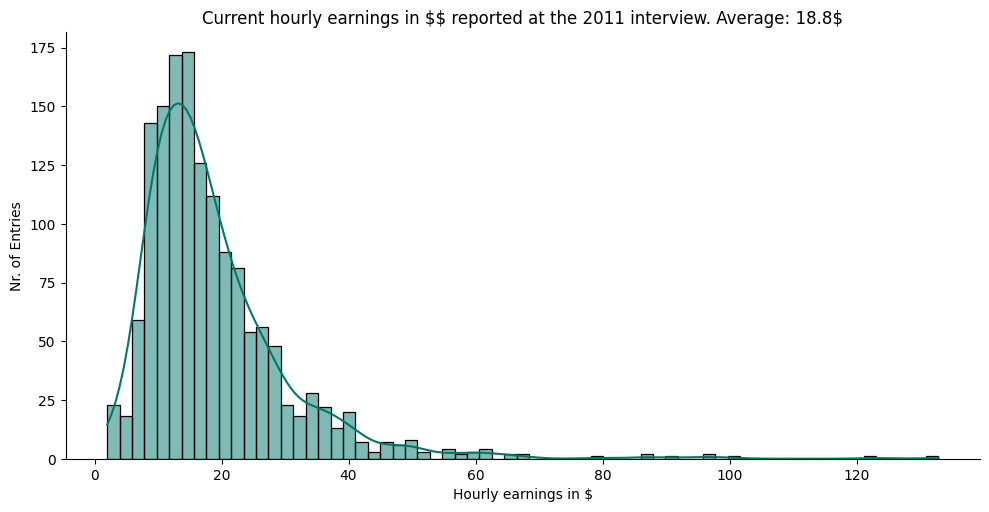

In [ ]:
sns.displot(df_data.EARNINGS, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Current hourly earnings in $$ reported at the 2011 interview. Average: {df_data.EARNINGS.mean():.3}$')
plt.xlabel('Hourly earnings in $')
plt.ylabel('Nr. of Entries')

plt.show()

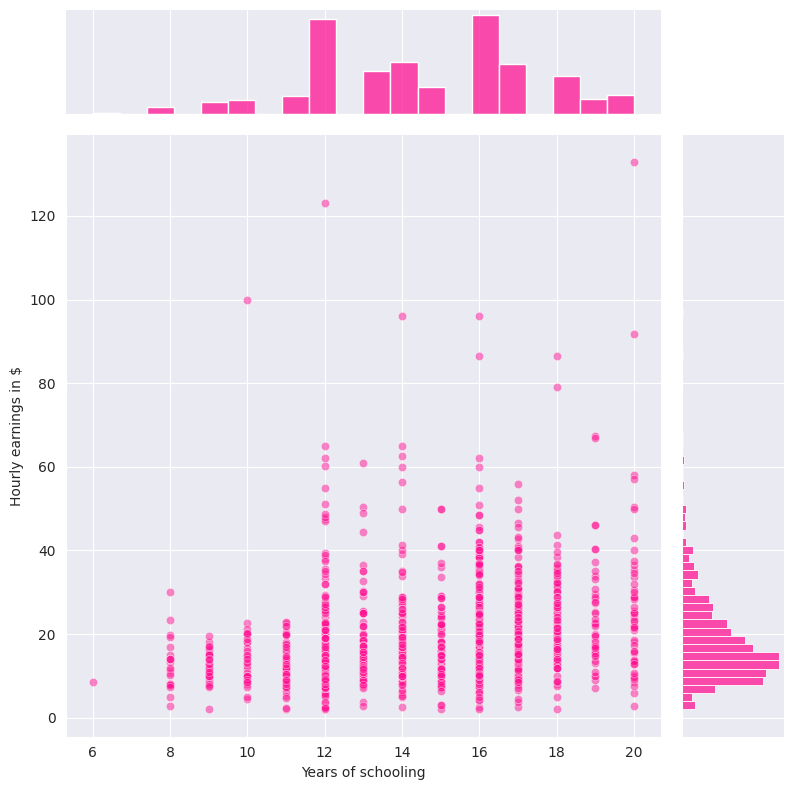

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data['S'], 
                y=df_data['EARNINGS'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.xlabel('Years of schooling')
plt.ylabel('Hourly earnings in $')

plt.show()

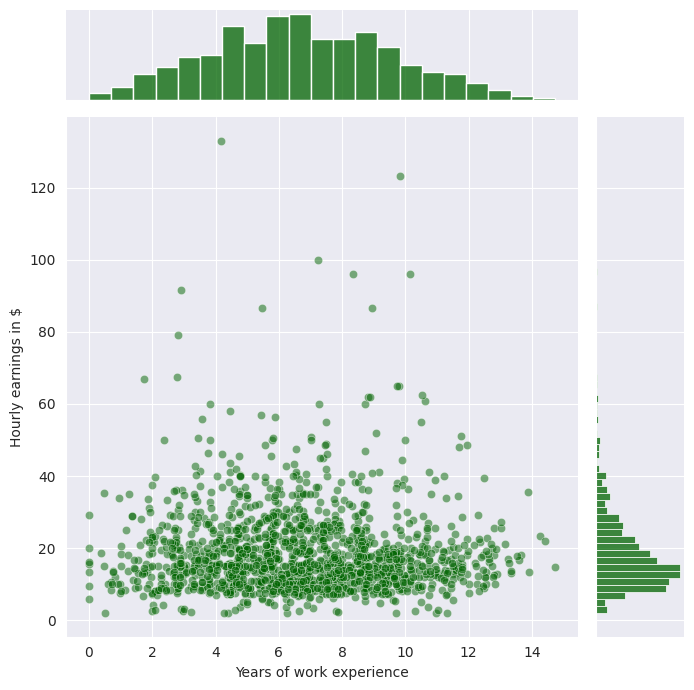

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data.EXP, 
                y=df_data.EARNINGS, 
                # kind='hex', 
                height=7, 
                color='darkgreen',
                joint_kws={'alpha':0.5})
  
plt.xlabel('Years of work experience')
plt.ylabel('Hourly earnings in $')

plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
target = df_data['EARNINGS']
features = df_data.drop('EARNINGS', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [ ]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [ ]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(df_data, columns=['S'])
 
# Response Variable or Target
y = pd.DataFrame(df_data, columns=['EARNINGS']) 

# Find the best-fit line
regression.fit(X, y)

LinearRegression()

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [ ]:
print(f'The slope coefficient is: {regression.coef_[0, 0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(X, y)}')

The slope coefficient is: 1.2210596900130288
The intercept is: 1.0322272696556674
The r-squared is: 0.07923944586935583


In [ ]:
print(f'Based on this model we can expect to earn {regression.coef_[0, 0]} extra dollars for an additional year of schooling.')

Based on this model we can expect to earn 1.2210596900130288 extra dollars for an additional year of schooling.


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [ ]:
predicted_values = regression.predict(X)
residuals = (y - predicted_values)

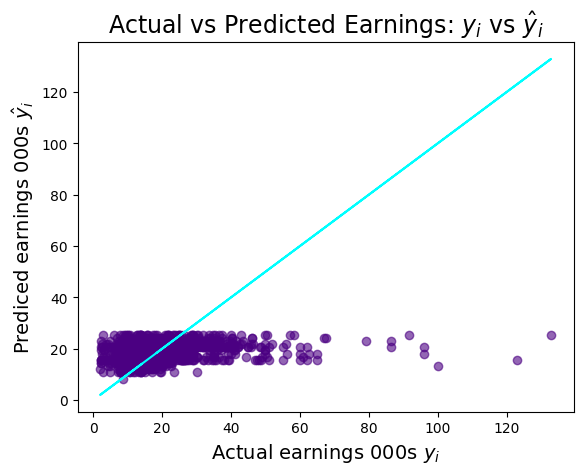

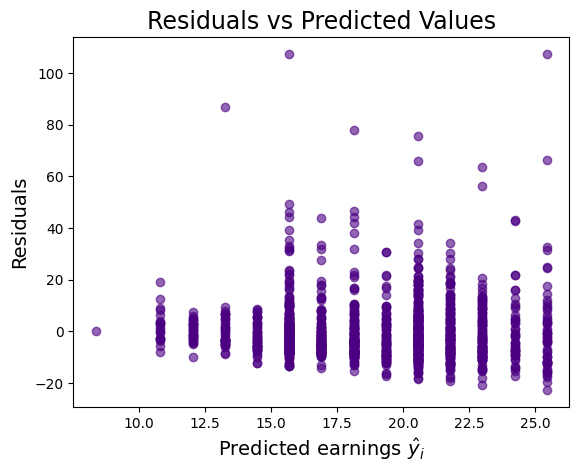

In [ ]:
# Original Regression of Actual vs. Predicted Earnings
plt.figure(dpi=100)
plt.scatter(x=y, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y, y, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual earnings 000s $y _i$', fontsize=14)
plt.ylabel('Prediced earnings 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared}')

Training data r-squared: 0.30774385799078585


### Evaluate the Coefficients of the Model

In [ ]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
ID,-0.00
S,1.19
EXP,0.90
FEMALE,-18.40
MALE,-16.43
...,...
MSA11NO,-4.20
MSA11NCC,-3.92
MSA11CC,-3.06
MSA11NK,2.62


### Analyse the Estimated Values & Regression Residuals

In [ ]:
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)

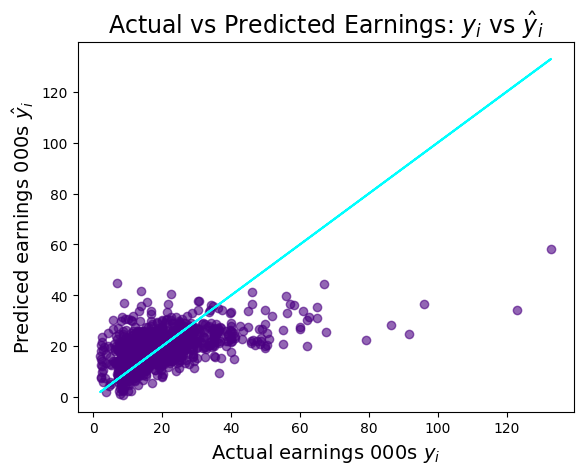

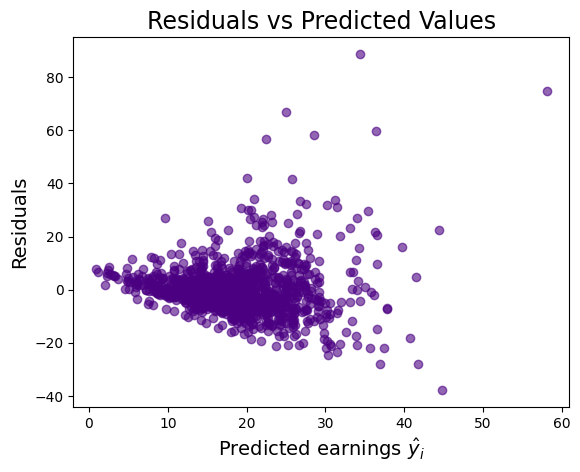

In [ ]:
# Original Regression of Actual vs. Predicted Earnings
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual earnings 000s $y _i$', fontsize=14)
plt.ylabel('Prediced earnings 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

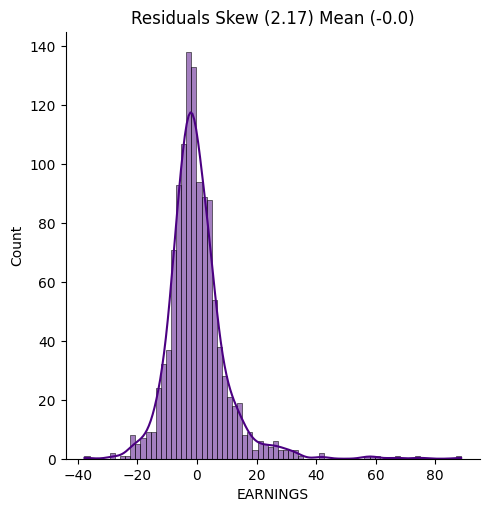

In [ ]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

We see that the residuals have a skewness of 2.17. There could be some room for improvement here.

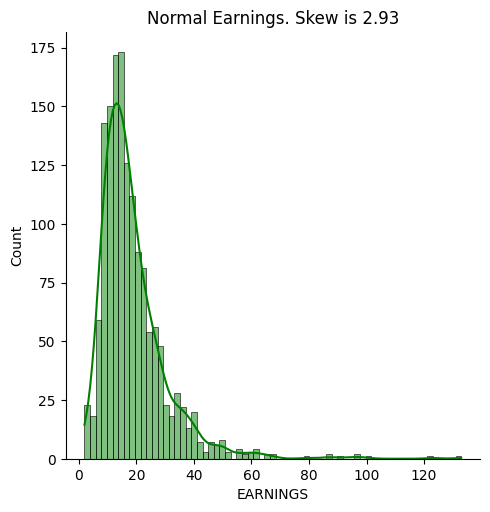

In [ ]:
tgt_skew = df_data['EARNINGS'].skew()
sns.displot(df_data['EARNINGS'], kde='kde', color='green')
plt.title(f'Normal Earnings. Skew is {tgt_skew:.3}')
plt.show()

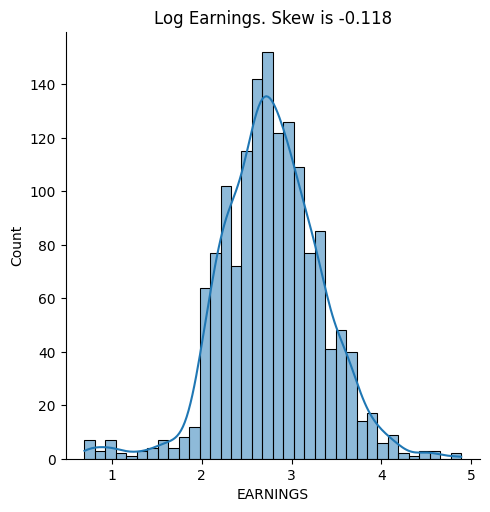

In [ ]:
y_log = np.log(df_data['EARNINGS'])
sns.displot(y_log, kde=True)
plt.title(f'Log Earnings. Skew is {y_log.skew():.3}')
plt.show()

The log earnings have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log earnings will improve our regression's r-squared and our model's residuals.

In [ ]:
new_target = np.log(df_data['EARNINGS']) # Use log earnings
features = df_data.drop('EARNINGS', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.34


This time we got an r-squared of 0.34 compared to 0.31. This looks like a promising improvement.

In [ ]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

,coef
ID,-0.00
S,0.05
EXP,0.05
FEMALE,-0.80
MALE,-0.68
...,...
MSA11NO,-0.21
MSA11NCC,-0.16
MSA11CC,-0.13
MSA11NK,0.14


So how can we interpret the coefficients? The key thing we look for is still the sign - having more years of education mean higher earnings, because the value of S is positive.

More years of experience - a higher EXP - is a clear positive, so have a positive coefficient for PTRATIO.

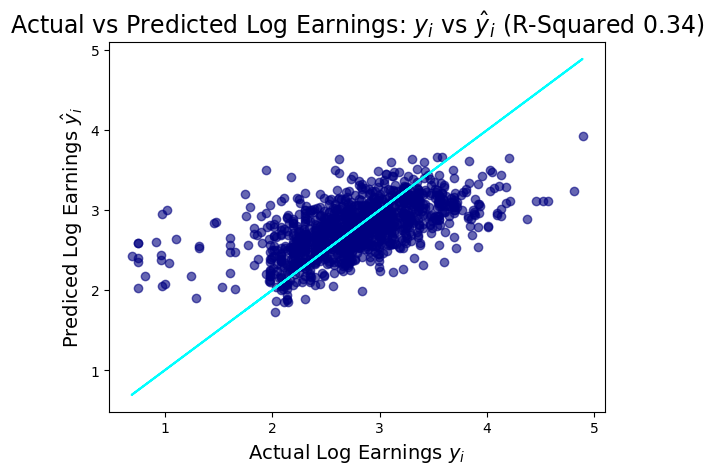

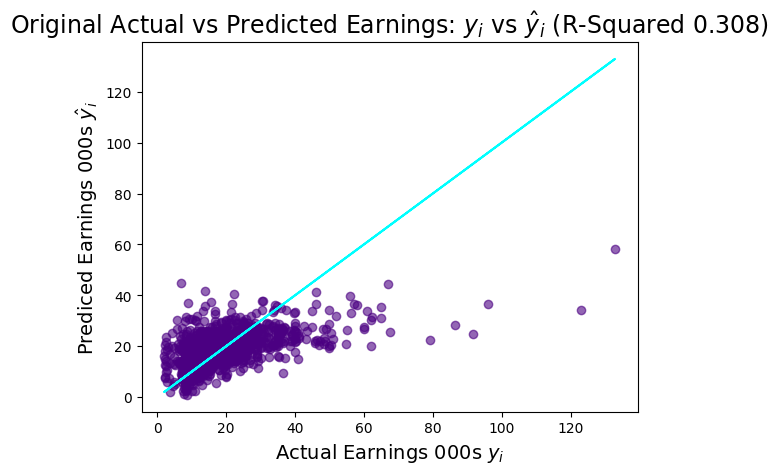

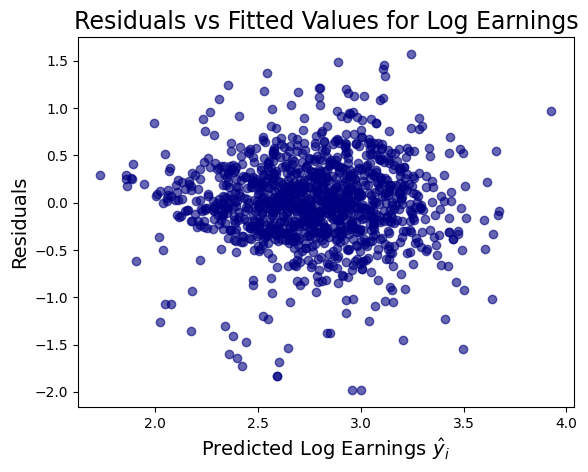

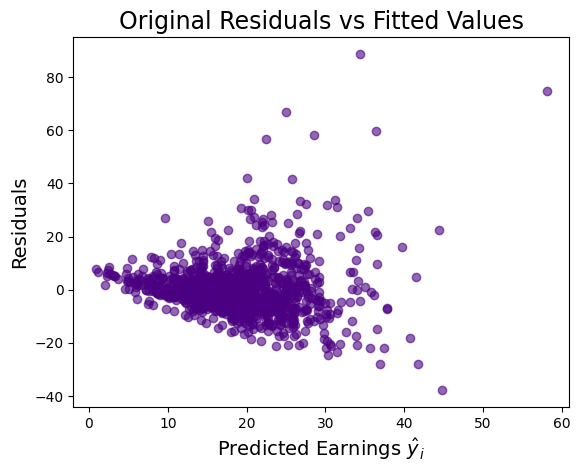

In [ ]:
# Graph of Actual vs. Predicted Log Earnings
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Earnings: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Earnings $y _i$', fontsize=14)
plt.ylabel('Prediced Log Earnings $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Earnings
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual Earnings 000s $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log Earnings)
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Earnings', fontsize=17)
plt.xlabel('Predicted Log Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


We can see a difference here just by eye. The predicted values are slightly closer to the cyan line.

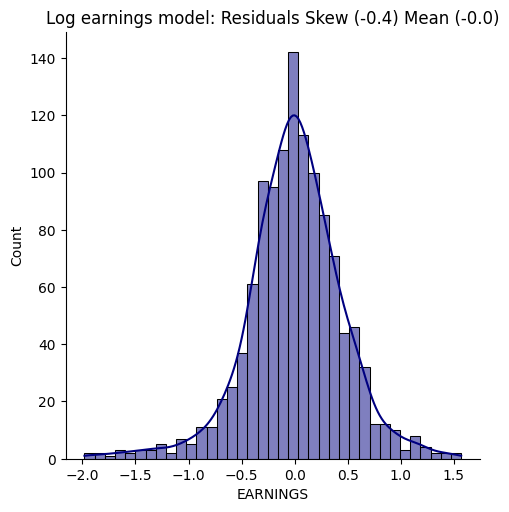

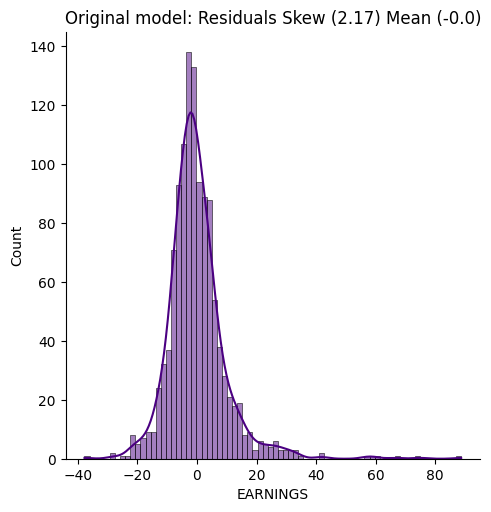

In [ ]:
# Distribution of Residuals (log earnings) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log earnings model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

Our new regression residuals have a skew of -0.4 compared to a skew of 2.17. The mean is still around 0. From both a residuals perspective and an r-squared perspective we have improved our model with the data transformation.

In [ ]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

Original Model Test Data r-squared: 0.17
Log Model Test Data r-squared: 0.25


By definition, the model has not been optimised for the testing data. Therefore performance will be worse than on the training data.

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [ ]:
# Starting Point: Average Values in the Dataset
features = df_data.drop(['EARNINGS'], axis=1)
average_vals = features.mean().values
earnings_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
earnings_stats

,ID,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,"3,547.13",14.56,6.70,0.49,0.51,"1,982.07",28.93,25.72,"47,252.43",293.07,...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00


In [ ]:
# Make prediction
log_estimate = log_regr.predict(earnings_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Earnings to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
# or use
dollar_est = np.exp(log_estimate) * 1000
print(f'The earnings is estimated to be ${dollar_est:.6}')

The log price estimate is $2.78
The earnings is estimated to be $16157.2


In [ ]:
# Define Earnings Characteristics
years_of_schooling = 16
years_of_experience = 5

In [ ]:
# Solution
# Set Earnings Characteristics
earnings_stats['S'] = years_of_schooling
earnings_stats['EXP'] = years_of_experience

In [ ]:
# Make prediction
log_estimate = log_regr.predict(earnings_stats)[0]
print(f'The log earnings estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate
print(f'The earnings per hour is estimated to be worth ${dollar_est:.4}')

The log earnings estimate is $2.78
The earnings per hour is estimated to be worth $16.16
